<a href="https://www.kaggle.com/code/violetmakena/spaceship-titanic-survival-prediction?scriptVersionId=134506057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
#import necessary modules needed for exploratoer data analysis 
import pandas as pd
#working and manupulating datasets 
import matplotlib.pyplot as plt
#visualisation
import seaborn as sns
#visualisations
import numpy as np
#perform numerical calculations
from scipy.stats import norm
#normalisation of the data 
from sklearn.preprocessing import StandardScaler
#standardize data
from scipy import stats
#statistical insights
import seaborn as sns

# **Loading Data**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
#import data 
sample_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [4]:
train_df= pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_df= pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# **Understanding and describing the data**

In [6]:
#data distribution or shape 

sample_sub.shape

(4277, 2)

In [7]:
# extract unique values 
unique_value = sample_sub['Transported'].unique()

# Print the unique values
for value in unique_value:
    print(value)

False


In [8]:
train_df.shape

(8693, 14)

In [9]:
test_df.shape

(4277, 13)

In [10]:
import pandas as pd

column_list_sample = sample_sub.columns.tolist()

# Print the list of column names
print(column_list_sample)


['PassengerId', 'Transported']


In [11]:
import pandas as pd

column_list_train = train_df.columns.tolist()

# Print the list of column names
print(column_list_train)


['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [12]:
import pandas as pd

column_list_test = test_df.columns.tolist()

# Print the list of column names
print(column_list_test)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


In [13]:
import pandas as pd


# and you want to extract unique values from columns 
selected_columns_train = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

# Get unique values from each column
unique_values = {}
for column in selected_columns_train:
    unique_values[column] = train_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()


Unique values in column 'HomePlanet':
Europa
Earth
Mars
nan

Unique values in column 'CryoSleep':
False
True
nan

Unique values in column 'Destination':
TRAPPIST-1e
PSO J318.5-22
55 Cancri e
nan

Unique values in column 'VIP':
False
True
nan

Unique values in column 'Transported':
False
True



In [14]:
import pandas as pd

column_list_test = test_df.columns.tolist()

# Print the list of column names
print(column_list_test)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


In [15]:
import pandas as pd


# and you want to extract unique values from columns 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', and 'Transported'
selected_columns_test = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Get unique values from each column
unique_values = {}
for column in selected_columns_test:
    unique_values[column] = test_df[column].unique()


# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()



Unique values in column 'HomePlanet':
Earth
Europa
Mars
nan

Unique values in column 'CryoSleep':
True
False
nan

Unique values in column 'Destination':
TRAPPIST-1e
55 Cancri e
PSO J318.5-22
nan

Unique values in column 'VIP':
False
nan
True



**identifying missing values**

In [16]:
#looking for missing or null figures 
sample_sub.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

In [17]:
#looking for missing or null figures 
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [18]:
#looking for missing or null figures 
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [19]:
#removing null values
import pandas as pd

# Remove rows with null values
sample_sub.dropna(inplace=True)

# Print the updated DataFrame
print(sample_sub)

sample_sub.isnull().sum()#check if data has no null values


     PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]


PassengerId    0
Transported    0
dtype: int64

In [20]:
# Remove rows with null values
train_df.dropna(inplace=True)

# Print the updated DataFrame
print(train_df)

train_df.isnull().sum()#check if data has no null values


     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [21]:
# Remove rows with null values
test_df.dropna(inplace=True)

# Print the updated DataFrame
print(test_df)

test_df.isnull().sum()#check if data has no null values


     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4269     9263_01      Earth      True  G/1495/S    TRAPPIST-1e  43.0  False   
4270     9265_01       Mars     False   D/278/S    TRAPPIST-1e  43.0  False   
4271     9266_01      Earth     False  F/1796/S    TRAPPIST-1e  40.0  False   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# Describing data

In [22]:
data_description_sample = sample_sub.describe()

# Print the data description
print(data_description_sample)

       PassengerId Transported
count         4277        4277
unique        4277           1
top        0013_01       False
freq             1        4277


The DataFrame contains 4277 rows.
There is one unique value in the 'PassengerId' column, indicating all passenger IDs are different.
The 'Transported' column has a single unique value, which is "False".
The 'Transported' column consists of the value "False" for all 4277 rows.

In [23]:
data_description_train = train_df.describe()

# Print the data description
print(data_description_train)

               Age  RoomService     FoodCourt  ShoppingMall           Spa  \
count  6606.000000  6606.000000   6606.000000   6606.000000   6606.000000   
mean     28.894036   222.991674    478.958523    178.356494    313.161520   
std      14.533429   644.987936   1678.592291    576.328407   1144.016291   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      19.000000     0.000000      0.000000      0.000000      0.000000   
50%      27.000000     0.000000      0.000000      0.000000      0.000000   
75%      38.000000    49.000000     82.750000     30.000000     65.000000   
max      79.000000  9920.000000  29813.000000  12253.000000  22408.000000   

             VRDeck  
count   6606.000000  
mean     303.780048  
std     1127.142166  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       52.000000  
max    20336.000000  


The DataFrame contains 6606 rows.
The 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns all have 6606 non-null values.
The 'Age' column has a minimum value of 0, a maximum value of 79, and various statistical measures such as mean, standard deviation, and quartiles.
Similar statistical measures apply to the other numerical columns.

In [24]:
data_description_test = test_df.describe()

# Print the data description
print(data_description_test)

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  3281.000000   3281.000000   3281.000000   3281.000000   3281.000000   
mean     28.582444    220.147516    440.914051    175.314233    296.718683   
std      14.112137    619.036964   1491.232741    569.268632   1086.436043   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     27.000000     49.000000   
max      79.000000  11567.000000  20809.000000   8292.000000  15733.000000   

             VRDeck  
count   3281.000000  
mean     300.355684  
std     1172.719307  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       34.000000  
max    19086.000000  


The DataFrame contains 3281 rows.
The 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck' columns all have 3281 non-null values.
The 'Age' column has a minimum value of 0, a maximum value of 79, and various statistical measures such as mean, standard deviation, and quartiles.
Similar statistical measures apply to the other numerical columns.
These descriptions provide an overview of the statistical properties and the number of non-null values for each column in the DataFrames.

# wrangling data 

In [25]:
#the common column is "PassengerId"

# Merging the data frames
merged_df = pd.merge(sample_sub, test_df, on='PassengerId')

# Print the merged data frame
print(merged_df)

     PassengerId  Transported HomePlanet CryoSleep     Cabin    Destination  \
0        0013_01        False      Earth      True     G/3/S    TRAPPIST-1e   
1        0018_01        False      Earth     False     F/4/S    TRAPPIST-1e   
2        0019_01        False     Europa      True     C/0/S    55 Cancri e   
3        0021_01        False     Europa     False     C/1/S    TRAPPIST-1e   
4        0023_01        False      Earth     False     F/5/S    TRAPPIST-1e   
...          ...          ...        ...       ...       ...            ...   
3276     9263_01        False      Earth      True  G/1495/S    TRAPPIST-1e   
3277     9265_01        False       Mars     False   D/278/S    TRAPPIST-1e   
3278     9266_01        False      Earth     False  F/1796/S    TRAPPIST-1e   
3279     9266_02        False      Earth      True  G/1496/S    TRAPPIST-1e   
3280     9277_01        False      Earth      True  G/1498/S  PSO J318.5-22   

       Age    VIP  RoomService  FoodCourt  Shopping

In [26]:
import pandas as pd


# and you want to extract unique values from columns 
selected_columns_merged = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

# Get unique values from each column
unique_values = {}
for column in selected_columns_train:
    unique_values[column] = train_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    for value in values:
        print(value)
    print()

Unique values in column 'HomePlanet':
Europa
Earth
Mars

Unique values in column 'CryoSleep':
False
True

Unique values in column 'Destination':
TRAPPIST-1e
PSO J318.5-22
55 Cancri e

Unique values in column 'VIP':
False
True

Unique values in column 'Transported':
False
True



In [27]:
merged_df.head()

,PassengerId,Transported,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,False,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,False,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,False,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,False,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,False,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [28]:
# Count the occurrences of each unique value in the 'Transported' column
transported_counts = merged_df['Transported'].value_counts()

# Print the counts
print(transported_counts)


False    3281
Name: Transported, dtype: int64


**Number of People tranported**

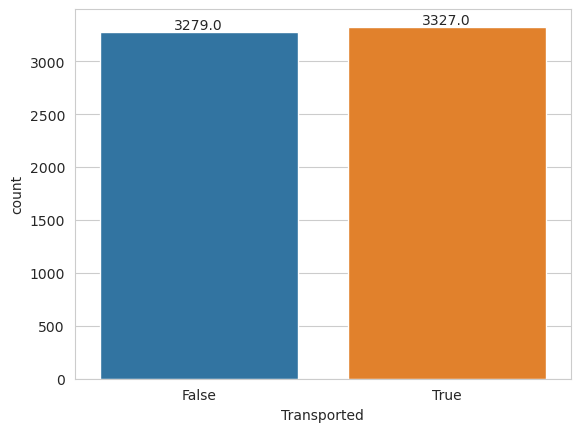

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_df
sns.set_style("whitegrid")

# Create the countplot
ax = sns.countplot(x="Transported", data=train_df)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


***create age distribution***

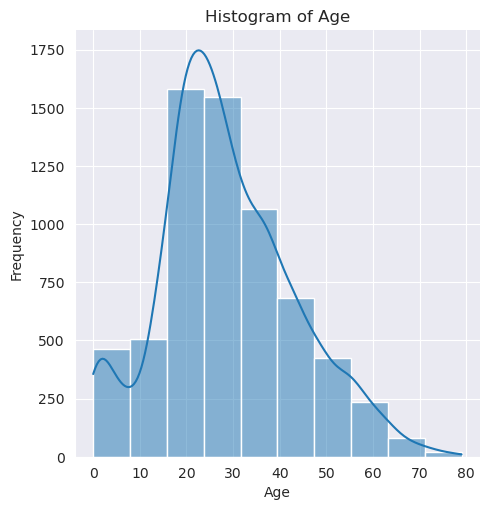

In [30]:
import seaborn as sns

sns.set_style("darkgrid")

# Create the histogram there is a sns change from "distplot" to "displot"
sns.displot(train_df['Age'], kde=True,bins=10)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

# Show the histogram
plt.show()


***Home planet distribution***

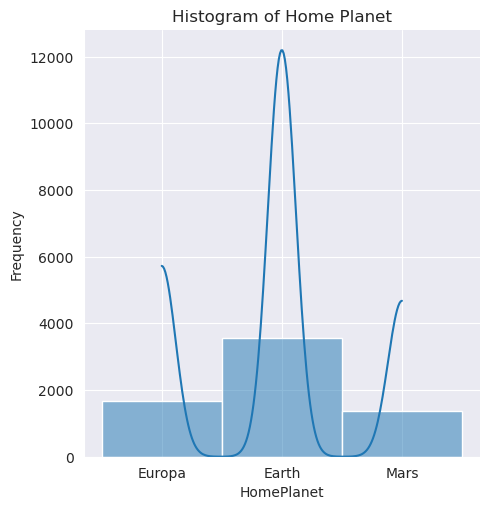

In [31]:
sns.set_style("darkgrid")

# Create the histogram there is a sns change from "distplot" to "displot"
sns.displot(train_df['HomePlanet'], kde=True)

# Set labels and title
plt.xlabel("HomePlanet")
plt.ylabel("Frequency")
plt.title("Histogram of Home Planet")

# Show the histogram
plt.show()


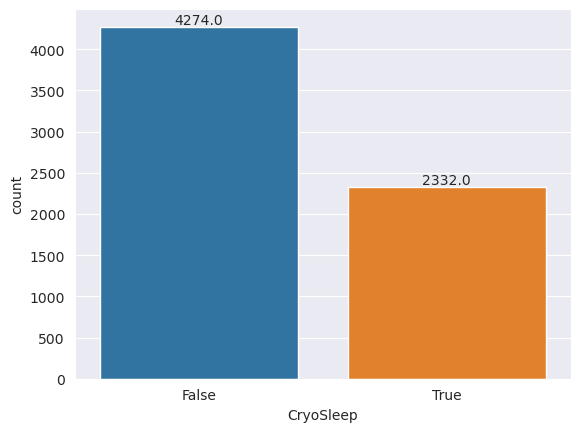

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_df
sns.set_style("darkgrid")

# Create the countplot
ax = sns.countplot(x="CryoSleep", data=train_df)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


# Correlation

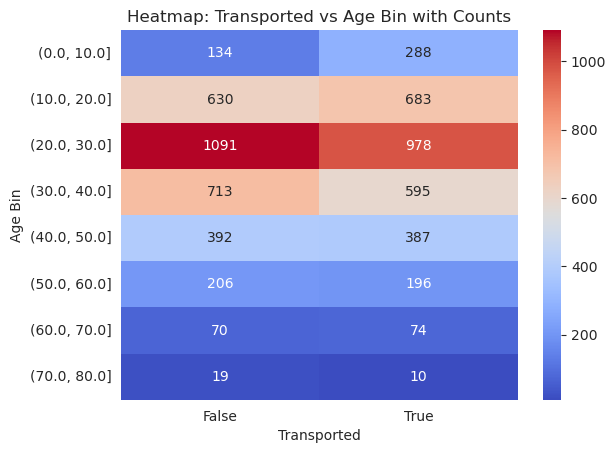

In [33]:
sns.set_style("whitegrid")

# Select the relevant columns
selected_columns = ['Age', 'Transported']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='Transported', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d')

# Set labels and title
plt.xlabel("Transported")
plt.ylabel("Age Bin")
plt.title("Heatmap: Transported vs Age Bin with Counts")

# Show the heatmap
plt.show()


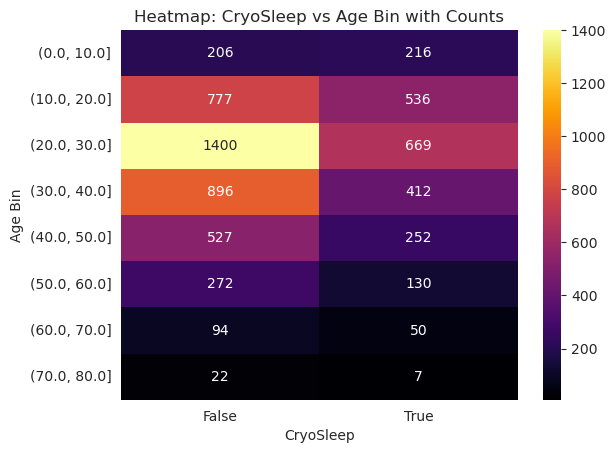

In [34]:
sns.set_style("darkgrid")

# Select the relevant columns
selected_columns = ['Age', 'CryoSleep']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='CryoSleep', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap='inferno', annot=True, fmt='d')

# Set labels and title
plt.xlabel("CryoSleep")
plt.ylabel("Age Bin")
plt.title("Heatmap: CryoSleep vs Age Bin with Counts")

# Show the heatmap
plt.show()


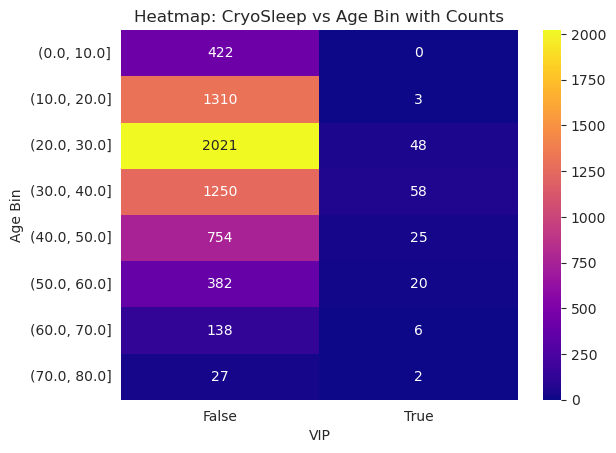

In [35]:
sns.set_style("darkgrid")

# Select the relevant columns
selected_columns = ['Age', 'VIP']
subset_df = train_df[selected_columns].copy()

# Create age bins of size 10
subset_df.loc[:, 'Age_Bin'] = pd.cut(subset_df['Age'], bins=np.arange(0, subset_df['Age'].max()+10, 10))

# Create a pivot table with counts
pivot_table = subset_df.pivot_table(index='Age_Bin', columns='VIP', aggfunc='size', fill_value=0)
# Create the heatmap
sns.heatmap(pivot_table, cmap='plasma', annot=True, fmt='d')

# Set labels and title
plt.xlabel("VIP")
plt.ylabel("Age Bin")
plt.title("Heatmap: CryoSleep vs Age Bin with Counts")

# Show the heatmap
plt.show()


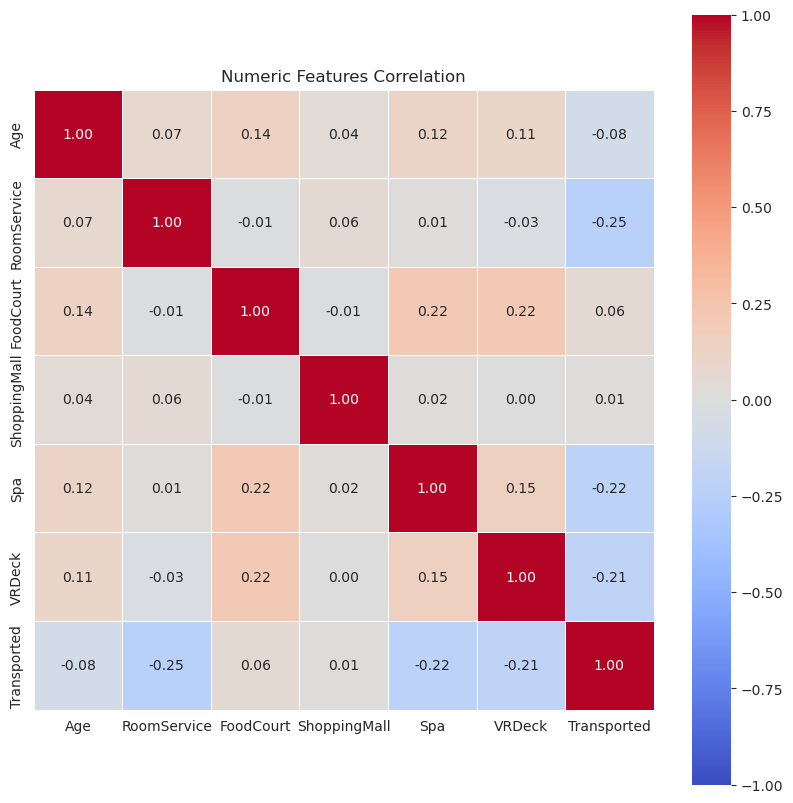

In [36]:
numc_corr = ['Age',
   'RoomService',
   'FoodCourt',
   'ShoppingMall',
   'Spa',
   'VRDeck',
   'Transported']

corr = train_df[numc_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True, fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, cmap='coolwarm')
plt.title('Numeric Features Correlation');

In [37]:
# Assuming you have a DataFrame called train_df
train_df['TotalCost'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


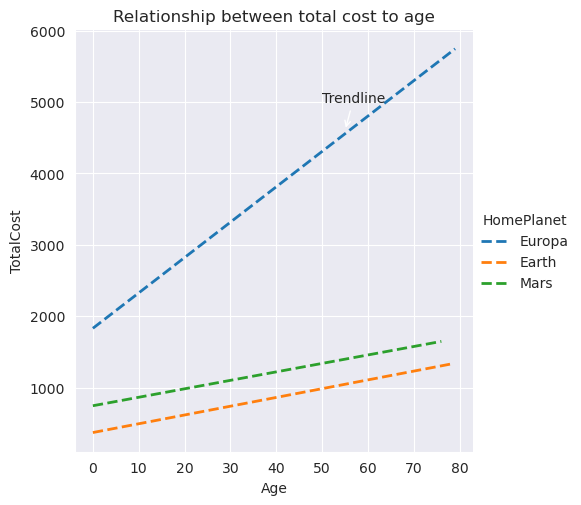

In [38]:
# add trendline
sns.lmplot(x="Age", y="TotalCost", hue="HomePlanet", data=train_df, order=1, ci=None, scatter=False, line_kws={"linestyle":"--", "linewidth":2})

# add label to trendline
plt.annotate("Trendline", xy=(55, 4600), xytext=(50, 5000), arrowprops=dict(facecolor='Black', arrowstyle="->"))

# add title
plt.title("Relationship between total cost to age")

plt.show()


The data analysis reveals that Europa, the home planet of the passengers, exhibits the highest overall cost. Moreover, there is a noticeable positive trend indicating that as the passengers' age increases, their allocated spend also tends to rise. This trend suggests that older passengers are more likely to avail themselves of additional services such as room service, food court, shopping mall, spa, and VR deck, resulting in higher total costs.

The dataset provides insights into the passengers' spending behavior and how it relates to their age and the various amenities available on the spacecraft. It implies that as passengers grow older, they are more inclined to indulge in the amenities provided, leading to increased expenditure.

Understanding these patterns can help service providers optimize their offerings and tailor them to different age groups. It also highlights the importance of considering demographic factors, such as age, when devising marketing strategies and making operational decisions related to onboard services and amenities.

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a subset of the train_df DataFrame with relevant columns
subset_df = train_df[['Age', 'VIP', 'TotalCost']]

subset_df.head()

,Age,VIP,TotalCost
0,39.0,False,0.0
1,24.0,False,736.0
2,58.0,True,10383.0
3,33.0,False,5176.0
4,16.0,False,1091.0


In [40]:
# Check the data type of a column
column_dtype = subset_df['Age'].dtype
print(column_dtype)


float64


In [41]:
subset_df.loc[:, 'Age'] = subset_df['Age'].astype('float64')
column_dtype = subset_df['Age'].dtype
print(column_dtype)

float64


/tmp/ipykernel_20/4098931745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.loc[:, 'Age'] = subset_df['Age'].astype('float64')


In [42]:
subset_df['Age_Bin'] = pd.cut(subset_df['Age'], bins=range(0, int(train_df['Age'].max()) + 11, 10))
subset_df.head()

/tmp/ipykernel_20/2311137241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Age_Bin'] = pd.cut(subset_df['Age'], bins=range(0, int(train_df['Age'].max()) + 11, 10))


,Age,VIP,TotalCost,Age_Bin
0,39.0,False,0.0,"(30, 40]"
1,24.0,False,736.0,"(20, 30]"
2,58.0,True,10383.0,"(50, 60]"
3,33.0,False,5176.0,"(30, 40]"
4,16.0,False,1091.0,"(10, 20]"


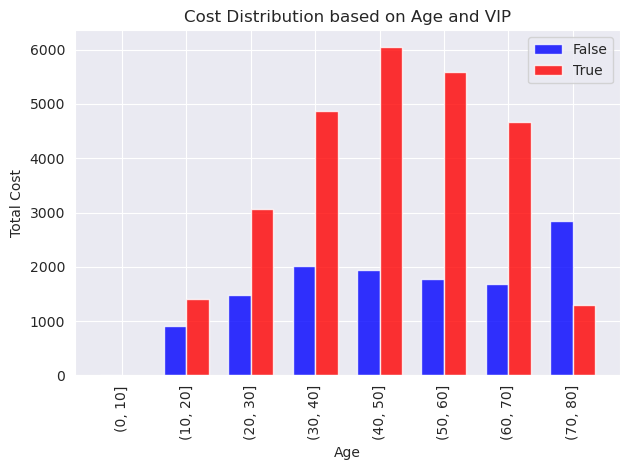

In [43]:
# Group data by age bins and VIP and compute the mean total cost
age_vip_mean = subset_df.groupby(['Age_Bin', 'VIP']).mean()

# Reset the index to have 'Age_Bin' and 'VIP' as regular columns
age_vip_mean = age_vip_mean.reset_index()

# Plot bar charts for total cost by age bins and VIP
fig, ax = plt.subplots()
vip_values = age_vip_mean['VIP'].unique()
bar_width = 0.35
opacity = 0.8
colors = ['blue', 'red']  # Adding colors for each VIP value

for i, vip_value in enumerate(vip_values):
    vip_subset = age_vip_mean[age_vip_mean['VIP'] == vip_value]
    x = vip_subset['Age_Bin']
    y = vip_subset['TotalCost']
    x_pos = [j + i * bar_width for j in range(len(x))]
    ax.bar(x_pos, y, bar_width, alpha=opacity, label=vip_value, color=colors[i])  # Use colors[i] for each bar

# Set the labels and title
plt.xlabel("Age")
plt.ylabel("Total Cost")
plt.title("Cost Distribution based on Age and VIP")
plt.xticks([i + 0.5 * bar_width for i in range(len(x))], x, rotation='vertical')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


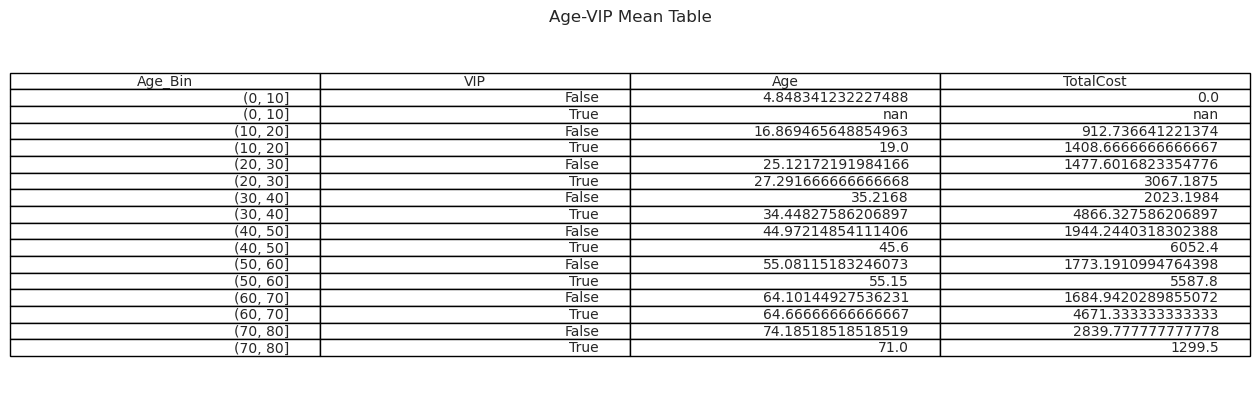

In [44]:
import matplotlib.pyplot as plt

# Create a table chart for age_vip_mean
fig, ax = plt.subplots()

# Hide axis
ax.axis('off')

# Create the table
table = ax.table(cellText=age_vip_mean.values, colLabels=age_vip_mean.columns, loc='center')

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.5, 1)

# Set the title
plt.title("Age-VIP Mean Table")

# Display the table
plt.show()


The dataset provides insights into the mean values of the 'Age' and 'TotalCost' variables, segmented by age bins and VIP status. The 'Age_Bin' column represents the age ranges, while the 'VIP' column indicates whether the customers are VIP (True) or non-VIP (False). By analyzing specific rows, we can gain further understanding. For instance, in the age range of 0-10, non-VIP customers have an average age of approximately 4.85 and incur no costs on average. Conversely, VIP customers aged between 20 and 30 exhibit an average age of around 27.29 and tend to have an average total cost of approximately 3067.19. Similar patterns can be observed for other age bins and VIP categories. These findings provide valuable insights into the relationship between age, VIP status, and the associated average costs.

# Predictions

In [45]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Total Cost: [5087.68683118]


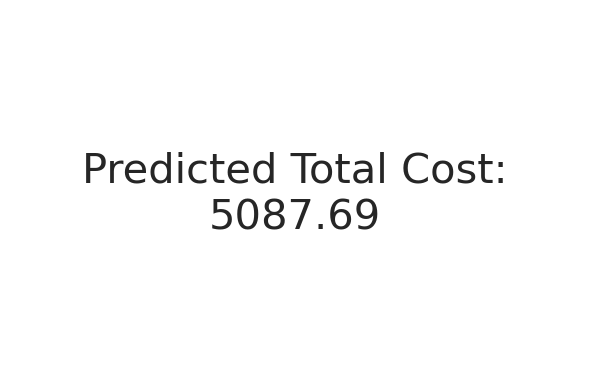

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create feature matrix X and target variable y
X = train_df[['Age', 'VIP','Transported']]  # Select the relevant columns for the features
y = train_df['TotalCost']     # Select the target variable

# Create linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions
age = 45   # Example age
vip = 1     # Example VIP status (1 for True, 0 for False)
transported = 0  # Example value for the 'Transported' feature (1 for True, 0 for False)


# Reshape the input as a 2D array since we have a single sample
prediction = model.predict(np.array([[age, vip, transported]]).reshape(1, -1))

print("Predicted Total Cost:", prediction)

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 4))
# Plot the text
plt.text(0.5, 0.5, f"Predicted Total Cost:\n{prediction[0]:.2f}", ha='center', va='center', fontsize=30)
# Remove the axis ticks and labels
plt.axis('off')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()


